In [1]:
from datetime import datetime
from elasticsearch import Elasticsearch
from pandas import DataFrame, Series
import pandas as pd

In [2]:
es = Elasticsearch(['localhost:9212'])

In [4]:
res = es.search(index='user_live_updated', doc_type = 'tweet', body = {
            "query": {
                "range": {
                    "created_at": {
                      
                        "lte": "now"
                      
                    }
                }
            },
            "aggs": {
                "days": {
                    "date_histogram": {
                        "field": "created_at",
                        "interval": "hour"
                    }
                }
            },
            "size": 0})


In [5]:
buckets = (res['aggregations']['days']['buckets'])

In [6]:
for element in buckets: 
        del element['key'] 

In [7]:
df = pd.DataFrame(buckets,columns=['key_as_string', 'doc_count'])
df.columns = ['date', 'doc_count']

In [8]:
res2 = es.search(index='live_updated', doc_type = 'tweet', body = {
            "query": {
                "range": {
                    "created_at": {
                      
                        "lte": "now"
                      
                    }
                }
            },
            "aggs": {
                "days": {
                    "date_histogram": {
                        "field": "created_at",
                        "interval": "hour"
                    }
                }
            },
            "size": 0})
            

In [9]:
buckets2 = (res2['aggregations']['days']['buckets'])

In [10]:
for element in buckets2: 
        del element['key'] 

In [11]:
df2 = pd.DataFrame(buckets2,columns=['key_as_string', 'doc_count'])
df2.columns = ['date', 'doc_count']


In [12]:
df3 = df.merge(df2, on='date')

In [13]:
df3.columns = ['date', 'doc_count_bot', 'doc_count_human']

In [14]:
df3['total_tweets'] = df3['doc_count_bot'] + df3['doc_count_human']

In [35]:
df3['date'] = pd.to_datetime(df3['date'])

In [21]:

pd.options.display.float_format = '{:,.2f}'.format

In [17]:
df3['normalize_bot'] = (df3['doc_count_bot'] - min(df3['doc_count_bot']))/(max(df3['doc_count_bot'])-min(df3['doc_count_bot']))

In [18]:
df3['normalize_human'] = (df3['doc_count_human'] - min(df3['doc_count_human']))/(max(df3['doc_count_human'])-min(df3['doc_count_human']))

In [19]:
df3['normalize_total'] = (df3['total_tweets'] - min(df3['total_tweets']))/(max(df3['total_tweets'])-min(df3['total_tweets']))

In [22]:
df3

,date,doc_count_bot,doc_count_human,total_tweets,normalize_bot,normalize_human,normalize_total
0,2017-06-07 17:00:00,1,369,370,0.00,0.45,0.02
1,2017-06-07 18:00:00,0,412,412,0.00,0.50,0.02
2,2017-06-07 19:00:00,0,305,305,0.00,0.37,0.02
3,2017-06-07 20:00:00,0,217,217,0.00,0.27,0.01
4,2017-06-07 21:00:00,0,202,202,0.00,0.25,0.01
5,2017-06-07 22:00:00,0,174,174,0.00,0.21,0.01
6,2017-06-07 23:00:00,0,207,207,0.00,0.25,0.01
7,2017-06-08 00:00:00,0,179,179,0.00,0.22,0.01
8,2017-06-08 01:00:00,0,175,175,0.00,0.21,0.01
9,2017-06-08 02:00:00,0,143,143,0.00,0.17,0.01


In [31]:
df3['percent_bot'] = (df3['normalize_bot']/df3['normalize_total']) 
df3['percent_human'] = (df3['normalize_human']/df3['normalize_total']) 
df3

,date,doc_count_bot,doc_count_human,total_tweets,normalize_bot,normalize_human,normalize_total,percent_bot,percent_human
0,2017-06-07 17:00:00,1,369,370,0.00,0.45,0.02,0.00,23.13
1,2017-06-07 18:00:00,0,412,412,0.00,0.50,0.02,0.00,23.20
2,2017-06-07 19:00:00,0,305,305,0.00,0.37,0.02,0.00,23.20
3,2017-06-07 20:00:00,0,217,217,0.00,0.27,0.01,0.00,23.20
4,2017-06-07 21:00:00,0,202,202,0.00,0.25,0.01,0.00,23.20
5,2017-06-07 22:00:00,0,174,174,0.00,0.21,0.01,0.00,23.20
6,2017-06-07 23:00:00,0,207,207,0.00,0.25,0.01,0.00,23.20
7,2017-06-08 00:00:00,0,179,179,0.00,0.22,0.01,0.00,23.20
8,2017-06-08 01:00:00,0,175,175,0.00,0.21,0.01,0.00,23.20
9,2017-06-08 02:00:00,0,143,143,0.00,0.17,0.01,0.00,23.20


In [32]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

AttributeError: Can only use .dt accessor with datetimelike values

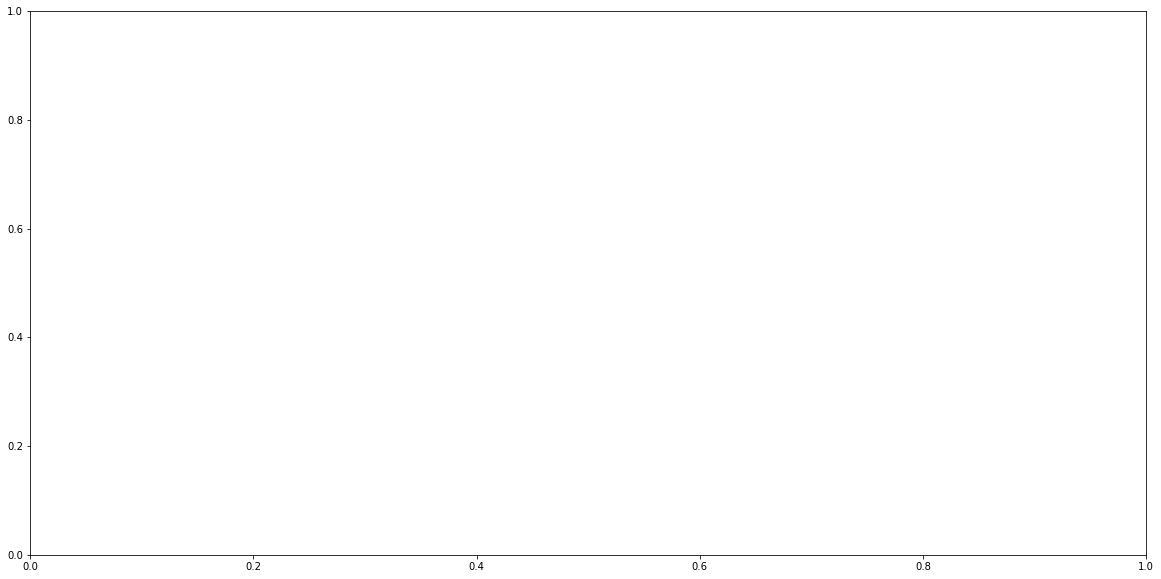

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
x = df['date'].dt.hour
p1 = ax.bar(df['date'].dt.hour, df["percent_human"])
p2 = ax.bar(df['date'].dt.hour, df["percent_bot"])
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date (Hour)', fontsize = 16, labelpad=20)
plt.ylabel('Number of Tweets', fontsize='18')
plt.suptitle('Times of bot tweets', fontsize='24')


plt.show()